#  Project 3: Stock Price Trend Prediction (Regression vs Classification)

## Description
Use past stock prices to predict tomorrow’s price or whether it will go up/down.

## Dataset
Use daily stock data from Yahoo Finance using yfinanc or offline stock data

## Concepts
- Regression vs classification
- Predicting price (regression)
- Predicting direction (classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# 1. Load sample stock data from local CSV
stock = pd.read_csv("sample_stock_data.csv", index_col="Date", parse_dates=True)

In [3]:
# 2. Create target for next day's Close
stock['Target'] = stock['Close'].shift(-1)
stock.dropna(inplace=True)

In [4]:
# 3. Features and targets
X = stock[["Open", "High", "Low", "Close", "Volume"]]
y_reg = stock["Target"]
stock['Direction'] = (stock['Target'] > stock['Close']).astype(int)
y_clf = stock["Direction"]

In [5]:
# 4. Train/test split
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42
)

In [6]:
# 5. Linear Regression
reg_model = LinearRegression()
reg_model.fit(X_train, y_reg_train)
reg_pred = reg_model.predict(X_test)
reg_rmse = np.sqrt(mean_squared_error(y_reg_test, reg_pred))
print(f"[Regression] RMSE: {reg_rmse:.2f}")

[Regression] RMSE: 0.96


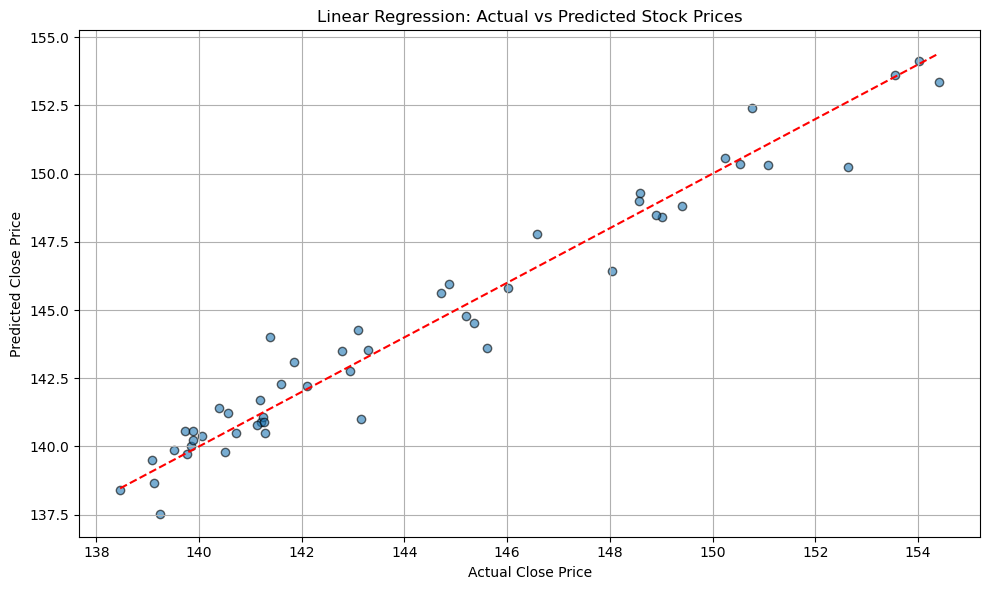

In [7]:
# 6. Plot: Actual vs Predicted Close Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, reg_pred, alpha=0.6, edgecolors='k')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Linear Regression: Actual vs Predicted Stock Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 **Actual vs Predicted Stock Prices (Linear Regression)**

### 💡 What You See:

* A scatter plot with:

  * **Blue dots**: Each point represents one day’s actual closing price (x-axis) vs. the predicted closing price (y-axis).
  * **Red dashed line**: Ideal prediction line where predicted = actual.

### ✅ What It Means:

* If the model were perfect, **all points would lie exactly on the red line**.
* Points **close to the line** = good predictions.
* Points **far from the line** = larger prediction error.

### 🔍 How to Interpret:

* **Tight cluster near the line**: Your linear regression model is doing a decent job.
* **Systematic deviation (above/below the line)**: Model may be biased or miss nonlinear patterns.
* **RMSE** (printed earlier) tells you the average error — the lower, the better.

In [8]:
# 7. Logistic Regression
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train, y_clf_train)
clf_pred = clf_model.predict(X_test)
clf_acc = accuracy_score(y_clf_test, clf_pred)
print(f"[Classification] Accuracy: {clf_acc:.2f}")

[Classification] Accuracy: 0.49


In [9]:
# 8. Logistic Regression model
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train, y_clf_train)
clf_pred = clf_model.predict(X_test)
clf_acc = accuracy_score(y_clf_test, clf_pred)
print(f"[Classification] Accuracy: {clf_acc:.2f}")

[Classification] Accuracy: 0.49


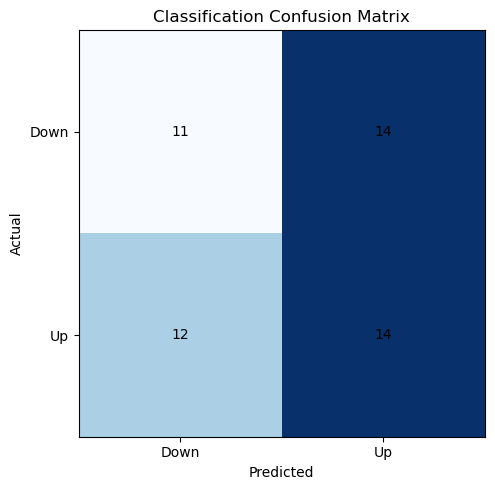

In [10]:
# 8. Plot: Confusion Matrix (basic visualization)
conf_matrix = confusion_matrix(y_clf_test, clf_pred)

plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['Down', 'Up'])
plt.yticks([0, 1], ['Down', 'Up'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

## 📊 **Confusion Matrix (Classification: Price Up or Down)**

### 💡 What You See:

* A 2x2 matrix with:

  * Rows = actual direction
  * Columns = predicted direction
  * Labels: “Up” (1), “Down” (0)

|                 | Predicted Down (0)  | Predicted Up (1)    |
| --------------- | ------------------- | ------------------- |
| Actual Down (0) | True Negative (TN)  | False Positive (FP) |
| Actual Up (1)   | False Negative (FN) | True Positive (TP)  |

### ✅ What It Means:

* **Diagonal values (TN + TP)**: Correct predictions
* **Off-diagonal values (FP + FN)**: Incorrect predictions

### 🔍 How to Interpret:

* **High diagonal values** (especially TP): Good at catching upward trends
* **Balanced counts**: No strong bias toward “up” or “down”
* **Imbalanced matrix**: Could suggest model bias or imbalanced data

### 🧠 Summary:

| Visual              | Shows                      | Helps You Understand                |
| ------------------- | -------------------------- | ----------------------------------- |
| 📈 Scatter Plot     | Prediction accuracy        | How well regression estimates price |
| 📊 Confusion Matrix | Classification correctness | How well model predicts direction   |